In [1]:
import numpy as np
import matplotlib.pyplot as plt
import popsims 
import wisps
import pandas as pd
import wisps.simulations as wispsim
from tqdm import tqdm 
import astropy.units as u
import numba
%matplotlib inline

Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database


In [2]:
#basic parameters with the usual assumptions 
model='baraffe2003'
models=[model]
p_data={}
for m in models:
    p_data.update({m:\
    popsims.make_systems(model=m, recompute=False, mass_age_range=[0.01, 0.1, 8, 14.0],\
    nsample=5e4, filename='/users/caganze/research/popsims/data/{}_thick.pkl'.format(m))})
    
    p_data.update({m+'thin': popsims.make_systems(model=m, 
                                                  recompute=False,  mass_age_range=[0.01, 0.01, 0.001, 8.0],
                  nsample=5e4, filename='/users/caganze/research/popsims/data/{}.pkl'.format(m))})

In [3]:
popsims.make_systems?

In [10]:

res=popsims.make_systems(model_name='burrows2001', recompute=True,  range=[0.01, 0.1, 0.001, 8.0],
                  nsample=1e6, filename='/volumes/TOSHIBA/wispsdata/db/{}.pkl'.format('burrows2001'))
baraff=popsims.make_systems(model_name='baraffe2003', recompute=True,  range=[0.01, 0.1, 0.001, 8.0],
                  nsample=1e6, filename='/volumes/TOSHIBA/wispsdata/db/{}.pkl'.format('baraffe2003'))

popsims.DATA_FOLDER

'/volumes/TOSHIBA/wispsdata/db/'

[Text(0.5, 1.0, 'Teff')]

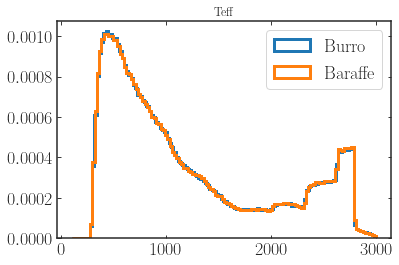

In [12]:
fig, ax=plt.subplots()
h=plt.hist(res['temperature'], bins='auto', histtype='step', label='Burro', 
           range=[100, 3000], lw=3, density=True)
h=plt.hist(baraff['temperature'], bins='auto', range=[100, 3000], density=True,
           histtype='step', label='Baraffe', lw=3)
plt.legend()
ax.set(title='Teff')

KeyError: 'system_spts'

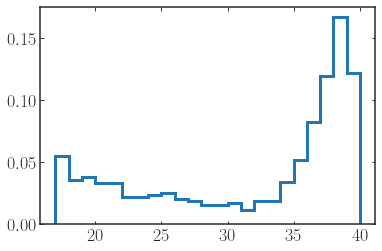

In [13]:
fig, ax=plt.subplots()
h=plt.hist(res['spt'], histtype='step', label='Baraffe', 
           range=[17, 40], bins= 40-17, lw=3, density=True)
h=plt.hist(baraff['system_spts'], bins= 40-17, range=[17, 40], density=True,
           histtype='step', label='Burrows', lw=3)
plt.legend()
ax.set(title='SpT')

In [ ]:
fig, ax=plt.subplots()
h=plt.hist(res['system_age'], histtype='step', label='Baraffe', 
           bins= 40-17, lw=3, density=True)
h=plt.hist(baraff['system_age'], bins= 40-17,  density=True,
           histtype='step', label='Burrows', lw=3)
plt.legend()
ax.set(title='Age')

In [ ]:
fig, ax=plt.subplots()
h=plt.hist(res['system_mass'], histtype='step', label='Baraffe', 
           bins= 40-17, lw=3, density=True)
h=plt.hist(baraff['system_mass'], bins= 40-17,  density=True,
           histtype='step', label='Burrows', lw=3)
plt.legend()
ax.set(title='Mass')

In [ ]:
import seaborn as sns

In [ ]:
colors1 = plt.cm.coolwarm(np.linspace(0., 1, 256))
colors2=plt.cm.YlOrBr(np.linspace(0., 1, 256))
colors = np.vstack((colors1+colors1+colors2)/3)
import matplotlib.colors as mcolors
mymap=mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [23]:
def plot_grid(model, ax):

    model_filename=wispsim.EVOL_MODELS_FOLDER+'//'+model.lower()+'.csv'

    evolutiomodel=pd.read_csv( model_filename)

    evolutiomodel['logmass']=np.log10(evolutiomodel.mass)

    evolutiomodel['logage']=np.log10(evolutiomodel.age)

    #mp=ax.scatter(np.log10(evolutiomodel.mass), np.log10(evolutiomodel.age), 

    #              c=evolutiomodel.temperature, vmin=200, vmax=3100, cmap=mymap, marker='*', s=200)8
    

    print  (model)

    print ('mass',evolutiomodel['mass'].min(), evolutiomodel['mass'].max())

    print ('age',evolutiomodel['age'].min(), evolutiomodel['age'].max())

    print ('temperature',evolutiomodel['temperature'].min(), evolutiomodel['temperature'].max())

   

    

    

    sns.lineplot(data=evolutiomodel, x="logage", y="temperature", hue="logmass", palette='cividis', 

                 linewidth=2.5, ax=ax, legend=False, hue_norm=(-3.31,-0.6), err_style=None)

    

    

    #evolutiomodel.plot.hexbin(x='logmass', y='logage', C='temperature', reduce_C_function=np.nanmean, gridsize=15, cmap=mymap, ax=ax)
    return 

In [15]:
import splat.empirical as spe
spe.typeToTeff('M7.0')[0].value

2655.2141656000003

In [21]:
import seaborn as sns

burrows2001
mass 0.0005 0.2
age 0.001 10.0
temperature 82.1005 4096.66
baraffe2003
mass 0.0005 0.1
age 0.001 10.0
temperature 111 3024


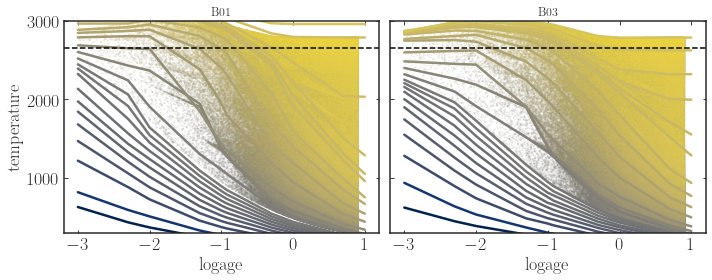

In [24]:
fig,(ax, ax1)=plt.subplots(ncols=2, figsize=(10, 4), sharex=True, sharey=True)

ax.scatter( np.log10(res['age']), res['temperature'], c= np.log10(res['mass']),
            alpha=0.1, s=1, cmap='cividis',vmin=-3.31, vmax=-0.6)
plot_grid('burrows2001', ax)

ax1.scatter( np.log10(baraff['age']), baraff['temperature'], c= np.log10(baraff['mass']),
            alpha=0.1, s=1, cmap='cividis', vmin=-3.31, vmax=-0.6)
plot_grid('baraffe2003', ax1)
ax.set(title='B01', ylim=[300, 3000])
ax1.set(title='B03', ylim=[300, 3000])

ax.axhline(spe.typeToTeff('M7.0')[0].value, linestyle='--', color='k')
ax1.axhline(spe.typeToTeff('M7.0')[0].value, linestyle='--', color='k')


plt.tight_layout()

In [25]:
import matplotlib

In [26]:
mymap='cividis'

burrows2001
mass 0.0005 0.2
age 0.001 10.0
temperature 82.1005 4096.66


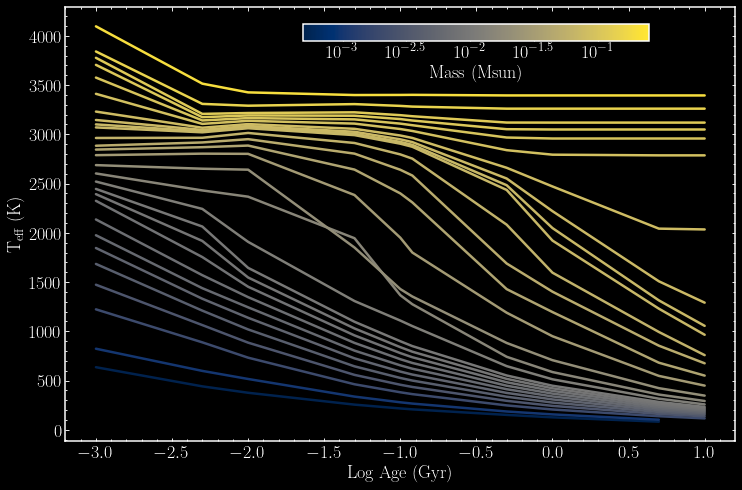

In [28]:

fig, ax=plt.subplots(figsize=(12, 8))
plot_grid('burrows2001', ax)

ax.set_ylabel(r'T$_\mathrm{eff}$ (K)', fontsize=18)
ax.set_xlabel(r'Log Age (Gyr)', fontsize=18)
ax.minorticks_on()


cax = fig.add_axes([0.4, .82, .4, 0.03])
norm=norm = matplotlib.colors.Normalize(vmin=-3.31,vmax=-0.6)
mp=matplotlib.cm.ScalarMappable(norm=norm, cmap=mymap)
cbar=plt.colorbar(mp, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'Mass (Msun)', fontsize=18)
cbar.ax.set_xticks([10**-3, 10**-2.5, 10**-2, 10**-1.5, 10**-1])
cbar.ax.set_xticklabels([r'10$^{-3}$', r'10$^{-2.5}$', r'10$^{-2}$', r'10$^{-1.5}$', r'10$^{-1}$'])    

ax.set(xlabel='Log Age (Gyr)')
plt.savefig(wisps.OUTPUT_FIGURES+'/burrows_grid.pdf', bbox_inches='tight')

In [30]:
#np.nanmedian(rands_s)

In [33]:
#plt.hist(rands_s)
#plt.axvline(np.nanmedian(rands_s), c='k', linestyle='--')

In [ ]:
#h=plt.hist(p_data[model]['system_spts'], range=[17, 40], bins=10, density=True, histtype='step')
#h=plt.hist(p_data[model+'thin']['system_spts'], range=[17, 40], bins=10, density=True, histtype='step')

In [35]:
 DISTANCE_SAMPLES=pd.read_pickle(wisps.OUTPUT_FILES+'/distance_samples{}.gz'.format(800))

In [36]:
thin_pnts=pd.read_pickle(wisps.OUTPUT_FILES+'/pointings_correctedf110.pkl')

In [37]:

#create new_pointings withe same parameters but different scaleheights 

In [ ]:
#wispsim.MAG_LIMITS

In [38]:
#get_numbers?
@numba.jit(nopython=True)
def fit_snr_exptime(ts, mag, d, e, f):
    return d*mag+e*np.log(ts/1000)+f

def get_snr(exp_grism, appf110s, appf140s, appf160s):
    #print (exp_grism)
    snrjs110= 10**(fit_snr_exptime(  exp_grism, appf110s, *list(wispsim.MAG_LIMITS['snr_exp']['F110'])))
    snrjs140= 10**(fit_snr_exptime(  exp_grism, appf140s, *list(wispsim.MAG_LIMITS['snr_exp']['F140'])))
    snrjs160= 10**(fit_snr_exptime(  exp_grism, appf160s, *list(wispsim.MAG_LIMITS['snr_exp']['F160'])))
    return np.nanmin(np.vstack([snrjs110, snrjs140, snrjs160]), axis=0)
    
def format_maglimits(wisp_limits):
    return {'WFC3_F110W':[16, wisp_limits['F110']],\
           'WFC3_F140W':[16, wisp_limits['F140']],\
           'WFC3_F160W':[16,wisp_limits['F160']]}

def make_cuts(df, dcts, expt):
    snr=get_snr(expt, df.WFC3_F110W.values, df.WFC3_F140W.values, df.WFC3_F160W.values)
    bools0=np.logical_or.reduce([df[k]< dcts[k][1] for k in dcts.keys()])
    return df[np.logical_and(bools0, snr>=3)]

def get_average_distance_limits(p, cuts):
    p.mag_limits=cuts
    return dict(pd.DataFrame(p.distance_limits).applymap(lambda x: \
                    x[1]).apply(lambda x: np.nanmedian(x), axis=1))

In [40]:
fov=4.1*(u.arcmin**2)
lf=pd.read_pickle(popsims.DATA_FOLDER+'/lf_scales.pkl')
        #scale lf

In [ ]:
#thin_pnt_index=np.arange(0, len(thin_pnts))

In [53]:
def get_numbers(w_pnts, fov, model_name='baraffe2003'):
    pointings=[popsims.Pointing(coord=p.coord, name=p.name) for p in tqdm(w_pnts)]
    mlimits=[x.mag_limits for x in w_pnts]
    exptimes=[x.exposure_time for x in w_pnts]
    NCOUNTS={}
    COUNT_DF={}
    for pintdex, pz in tqdm(enumerate(w_pnts)):
        
        scale=lf['baraffe2003']
        teffs=p_data[model_name]['temperature']
        spts= p_data[model_name]['spt']
        mask= np.logical_and( spts>=17, spts<=41)
        sn=len(teffs[np.logical_and(teffs>=450, teffs<=1950)])
        
        p= popsims.Pointing(coord=pz.coord, name=pz.name) 
        ml=pz.mag_limits
        cuts=format_maglimits(ml)
        spt_r=np.floor(spts).astype(int)[mask]
        dct= get_average_distance_limits(p, cuts)
    
        assert (len(spts[mask])== len(p_data[model_name]['age'][mask]))

            
        ds= np.array([np.random.choice(DISTANCE_SAMPLES[k][pintdex]) for k in spt_r])
        #print (ds)
        dff= popsims.create_population(p_data[model_name],p.coord, h=900, ds=ds, kind='disk', mask=mask)
    
        df_cut= make_cuts(dff, cuts, pz.exposure_time)
        
        nxbr_counts=[]
        
        for spt in np.arange(17, 40):
            sptvol=popsims.volume_calc(p.coord.galactic.l.radian, p.coord.galactic.b.radian,
                                       1., dct[spt], 900)*(fov.to(u.radian**2)).value
            df_select= df_cut[np.logical_and(df_cut.spt>=spt, df_cut.spt<spt+0.99)]
            

            nbrs=len(df_select)
            cnbrs=nbrs*sptvol*(scale[-1]/sn)
            nxbr_counts.append(cnbrs)
        NCOUNTS[p.name]=np.array(nxbr_counts)
        COUNT_DF[p.name]=df_cut
        #NCOUNTS[p.name+'df']=df_cut
    return NCOUNTS, COUNT_DF

In [ ]:
#dff= popsims.create_population(p_data[m],thin_pnts[0].coord, h=900, kind='disk')

In [50]:
p_data['baraffe2003']['age']

0         12.935138
1         10.861868
2         13.121376
3         10.518386
4         12.462020
            ...    
124995    11.435146
124996    10.841182
124997     8.378605
124998    10.889143
124999    10.428994
Name: age, Length: 625000, dtype: float64

In [ ]:
#snrs=get_snr(thin_pnts[0].exposure_time,\
#        dff.WFC3_F110W.values,dff.WFC3_F140W.values,dff.WFC3_F160W.values)

In [42]:
#

In [ ]:
#thin_pnts[:2]

In [ ]:
#df_cut

In [ ]:
NUMBERS, OUT_DF=get_numbers(thin_pnts, fov, model_name='baraffe2003')

 59%|█████▊    | 312/533 [18:24<16:30,  4.48s/it]

In [ ]:
#OUT_DF

In [ ]:
def bin_by_spt_bin(sp_types, number, ltonly=False):
    ranges=[[17, 20], [20, 25], [25, 30], [30, 35], [35, 40]]
    if ltonly:
        ranges=[[17, 20], [20, 30], [30, 41]]
    numbers=[]
    for r in ranges:
        idx= np.logical_and((r[0]<=sp_types), (r[1]>sp_types))
        numbers.append(np.nansum(number[idx]))
    return numbers



In [ ]:
def compute_volume(px, spt):
    cuts=format_maglimits(px.mag_limits)
    p=popsims.Pointing(coord=px.coord, name=px.name) 
    dct=get_average_distance_limits(p, cuts)
    return popsims.volume_calc(p.coord.galactic.l.radian, p.coord.galactic.b.radian,
                                       1., dct[spt], 900)*(fov.to(u.radian**2)).value

In [ ]:
ns=(pd.DataFrame(NUMBERS).sum(axis=1)).values

In [ ]:
np.array(bin_by_spt_bin( np.arange(17, 40), ns, ltonly=False))*0.12 